<a id='start'></a>
# Pandas DataFrame e Feature Engineering

In questo notebook vengono spiegati i principali metodi per raccogliere ed effettuare una prima manipolazione sui dati. <br>
La libreria più usata per effettuare queste operazioni principali è **Pandas**. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [DataFrame e Series](#section1)<a href='#section1'></a>; <br>
- [Importare i dati dall'esterno](#section2)<a href='#section2'></a>; <br>
- [Selezionare i dati del dataset](#section3)<a href='#section3'></a>; <br>
    - [Index - based Selection](#section4)<a href='#section4'></a><br>
    - [Label - based Selection](#section5)<a href='#section5'></a> <br>
    - [Conditional Selection](#section6)<a href='#section6'></a>
- [Analisi esplorativa dei dati](#section7)<a href='#section7'></a>
    - [Statistica Descrittiva](#descr_stats)<a href='#descr_stats'></a> <br>
    - [Esplorare la distribuzione dei dati](#expl_data_distri)<a href='#expl_data_distri'>
- [Ingegneria delle feature e trasformazioni](#engineering)<a href='#engineering'></a>
    - [Dati categorici](#categorical)<a href='#categorical'></a>
        - [Dict Vectorizer](#dict-vectorizer)<a href='#dict-vectorizer'></a>
        - [Ordinal Encoder](#ordinal-encoder)<a href='#ordinal-encoder'></a>
        - [One Hot Encoder](#one-hot-encoder)<a href='#one-hot-encoder'></a>
        - [Label Encoder](#label-encoder)<a href='#label-encoder'></a>
    - [Dati numerici](#numerical)<a href='#numerical'></a>
        - [StandardScaler](#label-encoder)<a href='#label-encoder'></a>
        - [MinMaxScaler](#label-encoder)<a href='#label-encoder'></a>
        - [Normalizzazione](#label-encoder)<a href='#label-encoder'></a>
    - [Riduzione della dimensionalità](#dimensionality)<a href='dimensionality'></a>
        - [Principal Component Analysis - PCA](#pca)<a href='#pca'></a>
        - [Isomap](#isomap)<a href='#isomap'></a>
</a>

<a id='section1'></a>
## DataFrame e Series

Introduciamo la libreria **Pandas**, utilizzata per creare e gestire gli oggetti: **Dataframe**.<br>

Gli oggetti *Series* e *Dataframe* possono essere importati da file (csv, xls, html, ..) oppure creati manualmente. <br>

Importiamo inizialmente la libreria Pandas

In [1]:
import pandas as pd

Un **DataFrame** è una tabella che contiene un array di singole voci, ognuna delle quali ha un certo valore. Ogni voce corrisponde ad una riga (o record) e ad una colonna.

In [2]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In [3]:
pd.DataFrame([[50,21], [131, 2]], columns=['Yes', 'No'])

,Yes,No
0,50,21
1,131,2


Un DataFrame può contenere anche caratteri stringa e non solo valori numerici

In [4]:
pd.DataFrame({'Audi': ['Migliore', 'Peggiore'], 'Mercedes': ['Peggiore', 'Migliore']})

,Audi,Mercedes
0,Migliore,Peggiore
1,Peggiore,Migliore


Le righe di un DataFrame prendono il nome di **Index** ed è possibile assegnargli un valore tramite il seguente codice:

In [5]:
pd.DataFrame({'Audi': ['Migliore', 'Peggiore'], 'Mercedes':['Peggiore', 'Migliore']}, index = ['Utilitaria', 'Sportiva'])

,Audi,Mercedes
Utilitaria,Migliore,Peggiore
Sportiva,Peggiore,Migliore


Una **Series**, è una sequenza di valori di dati. Se un DataFrame è una tabella, una serie è una lista.

In [6]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

È possibile assegnare dei valori alle righe di una Series allo stesso modo di prima, utilizzando un parametro indice. <br>
Inoltre, una Series non ha un nome di colonna, ma ha solo un nome complessivo

In [7]:
pd.Series([300, 450, 400], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product X')

2015 Sales    300
2016 Sales    450
2017 Sales    400
Name: Product X, dtype: int64

<a id='section2'></a>
## Importare i dati dall'esterno

In questa sezione del notebook ci occupiamo di come importare i dati da risorse esterne (csv, excel e html) grazie alla libreria Pandas.

### Importare dati da un csv

Il metodo da utilizzare per importare i dati da un csv con la libreria Pandas è __[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)__. <br>
Ci sono molti parametri per il metodo *read_csv*, i più importanti sono:
- sep
- delimeter
- header
- index_col
- skiprows
- na_values <br>
...

In [8]:
dataset = pd.read_csv("data/dataset.csv", index_col=0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


In [9]:
# Il metodo .head() permette di vedere le prime righe (di default le prime 5) di un DataFrame o di una Series
dataset.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [10]:
# il metodo .tail() permette di vedere le ultime righe (di default le prime 5) di un DataFrame o di una Series
dataset.tail()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
16,3,"Rice, Master. Eugene",male,2.0,29.125,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.000,S,0
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.225,C,1
20,2,"Fynney, Mr. Joseph J",male,35.0,26.000,S,0


### Importare dati da un file excel

Il metodo da utilizzare per importare i dati da un file excel con la libreria Pandas è __[read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)__. <br>
In questo caso sarà necessario indicare in quale sheet del file excel si trova il dataframe che vogliamo importare utilizzando il parametro *sheet_name*.

In [11]:
dataset = pd.read_excel("data/dataset_excel_workbook.xlsx", engine='openpyxl', sheet_name='dataset', index_col=0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


<a id='section3'></a>
## Selezionare i dati del dataset

In questa sezione impareremo i principali metodi per selezionare le colonne e le righe di un dataset, identificato sottoforma di DataFrame o Series.

Prima di continuare è necessario precisare che la libreria **Pandas** _non_ utilizza la denominazione, che viene usata comunemente per individuare gli assi di un database, ovvero *dimension* e *feature*. <br>
La libreria Pandas indica le dimensioni di una matrice, con il termine **axes**, ovvero utilizza il parametro **(axis = 0)** per indicare le righe di un dataset ed il parametro **(axis = 1)** per indicare le colonne di un dataset.

<img src="img/axis_Pandas.jpg">

In [12]:
# Rinomiamo il dataset importato precedentemente tramite file excel
titanic = dataset
titanic.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [13]:
# Selezioniamo la colonna Age del dataset titanic
titanic['Age'] # è possibile usare anche titanic.Age

1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
Name: Age, dtype: float64

Nella cella precedente abbiamo selezionato una colonna da un DataFrame ed è stata estratta assegnandole il formato **Series**. <br>
Abbiamo indicato due metodi per estrarre una colonna da un DataFrame, nessuno dei due è il migliore ma qualora il nome della colonna avesse uno spazio, ad esempio supponiamo fosse "Age Female", in quel caso dovremmo usare la notazione con le parentesi quadre.

In [14]:
# Selezioniamo ora la prima riga della colonna Age
titanic['Age'][1]

38.0

Pandas utilizza due paradigmi per selezionare i dati: <br>
- Index-based: ovvero basandosi sulla posizione numerica dei dati; <br>
- Label-based: ovvero basandosi sul valore di un indice dei dati.

<a id='section4'></a>
### Index-Based Selection

Il codice che si utilizza per effettuare una *index-based selection* è **iloc**.<br>
Ad esempio, selezioniamo la prima riga del dataset sul titanic:

In [15]:
titanic.iloc[0]

Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
Fare                                                  71.2833
Embarked                                                    C
Survived                                                    1
Name: 1, dtype: object

Sia il metodo **iloc** che **loc** (che vedremo dopo) sono *row-first, column-second* ovvero considerano come primo input il valore della riga e come secondo quello della colonna. Questo funzionamento è opposto al tradizionale comportamento di Python, che è *column-first, row-second*. <br>
Infatti poche righe sopra, prima di introdurre *iloc* e *loc* abbiamo usato il codice "titanic['Age'][1]", ovvero dataset[colonna][riga].

Per ottenere la colonna desiderata con iloc dobbiamo utilizzare la seguente sintassi:

In [16]:
# Stampo TUTTE le righe della colonna dei nomi
titanic.iloc[:,1]

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria V

In [17]:
# Stampo le prime 3 righe della colonna dei nomi
titanic.iloc[:3,1]

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
Name: Name, dtype: object

In [18]:
# Stampo le righe che mi interessano della colonna dei nomi
# In questo caso utilizzo una lista per indicare le righe che mi interessano
titanic.iloc[[1,2,3,5,7],1]

2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
6                              McCarthy, Mr. Timothy J
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Name: Name, dtype: object

<a id='section5'></a>
### Label-Based Selection

Il codice che si utilizza per effettuare una *label-based selection* è **loc**.<br>
Per ottenere il primo record del campo "Name" del dataset sul titanic dobbiamo utilizzare la seguente sintassi:

In [19]:
titanic.loc[1, 'Name']

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [20]:
titanic.loc[2, ['Name', 'Age', 'Pclass']]

Name      Heikkinen, Miss. Laina
Age                         26.0
Pclass                         3
Name: 2, dtype: object

Quando si sceglie o si passa da *loc* a *iloc*, c'è una **differenza** che è importante tenere a mente, cioè che **i due metodi utilizzano schemi di indicizzazione leggermente diversi**.<br>

**iloc** utilizza lo schema di indicizzazione Python stdlib: dove **il primo elemento del range è incluso e l'ultimo escluso.** Quindi iloc[0:10] selezionerà le voci 0,.....,9. <br>
**loc**, nel frattempo, **indicizza in modo inclusivo.** Così loc[0:10] selezionerà le voci 0,.....,10.

Supponiamo di avere un DataFrame con un semplice elenco numerico, ad esempio 0,......1000. In questo caso df.iloc[0:1000] restituirà 1000 voci, mentre df.loc[0:1000] ne restituirà 1001! Per ottenere 1000 elementi usando loc, dovremo utilizzare df.loc[0:999].


<a id='section6'></a>
### Conditional Selection

Durante le nostre analisi potremo aver bisogno di selezionare parti di un dataset sulla base dei valori che possono assumere i campi. Ovvero voler porre delle condizioni alle nostre selezioni.

Supponiamo di voler selezionare dal dataset del titanic solo le donne; iniziamo chiedendoci quali sono le righe che hanno come campo della colonna "Sex" il valore di "female":

In [21]:
titanic.Sex == "female"

1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17    False
18     True
19     True
20    False
Name: Sex, dtype: bool

Abbiamo ottenuto una colonna di True/False che possiamo utilizzare con l'operatore *loc* per selezionare nel dataset i campi riferiti solo alle donne:

In [22]:
titanic.loc[titanic.Sex == "female"]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.0000,S,0


Supponiamo ora di voler selezionare le donne che hanno meno di 30 anni:

In [23]:
# utilizziamo l'operatore logico &
titanic.loc[(titanic.Sex == "female") & (titanic.Age < 30)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare le femmine oppure tutti quelli che hanno meno di 30 anni, in questo caso sarà necessario utilizzare l'operatore **or**: |

In [24]:
titanic.loc[(titanic.Sex == "female") | (titanic.Age < 30)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
12,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Pandas ha dei *conditional selector* pre-costruiti che possono essere utili durante le analisi:<br>
- **isin**: permette di selezionare i dati il cui valore è in una lista di valori; <br>
- **isnull** (ed il suo complementare **notnull**: permette di selezionare i valori che sono o meno nulli (NaN). 

Supponiamo di voler selezionare solo le persone che appartengono alla seconda e terza classe (campo Pclass).

In [25]:
titanic.loc[titanic.Pclass.isin([2,3])]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
12,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,0
13,3,"Andersson, Mr. Anders Johan",male,39.0,31.2750,S,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare tutti i passeggeri che hanno età nulla:

In [26]:
titanic.loc[titanic.Age.isnull()]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.0000,S,1
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.2250,C,1


A questo punto possiamo anche associare un valore ad un campo una volta effettuata una selezione. <br>
Assegniamo a tutte le persone che hanno un valore di età nullo, l'età di 35 anni.

In [27]:
titanic.loc[titanic.Age.isnull(), 'Age'] = 35
titanic

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,35.0,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


Riprendiamo l'esempio dagli esercizi della scorsa lezione. Riprendiamo il dataset di ROOT e ripuliamo i valori che hanno valore per il campo `f_mass_jj` uguale a `-999`.

In [28]:
import uproot

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'

upfile = uproot.open(filename)
params = upfile[treename].arrays() # dictionary of NumPy arrays

VARS = ['f_massjj']

upfile = uproot.open(filename)
params = upfile[treename].arrays(VARS)

df = pd.DataFrame(params.tolist())
df

,f_massjj
0,-999.000000
1,-999.000000
2,-999.000000
3,1353.025513
4,-999.000000
...,...
58102,-999.000000
58103,-999.000000
58104,-999.000000
58105,-999.000000


In [29]:
df.dtypes

df_cleaned = df.loc[df['f_massjj'] != -999]
df_cleaned

,f_massjj
3,1353.025513
7,111.907364
28,147.763611
31,124.071999
32,777.092590
...,...
58056,114.257278
58057,106.195534
58060,53.661579
58062,71.162025


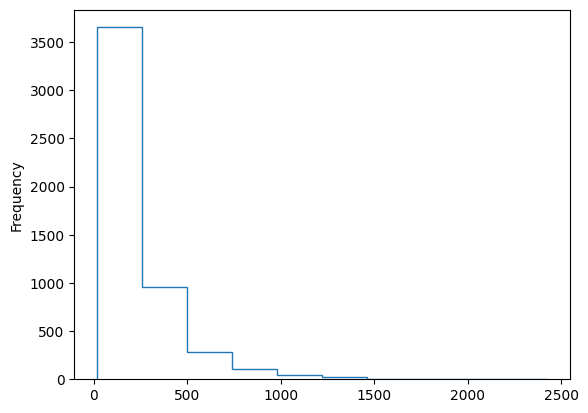

In [30]:
ax = df_cleaned['f_massjj'].plot.hist(bins=10, label='f_massjj', histtype='step')

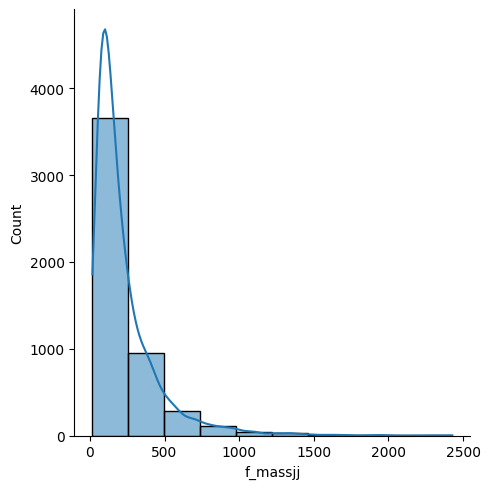

In [41]:
import seaborn as sns
ax = sns.displot(df_cleaned['f_massjj'], bins=10, kde=True)

Di seguito alcuni link utili: <br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/indexing.html'>Pandas - Indexing and Selecting Data</a><br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html'>Pandas - Comparison with Sql</a><br>

<a id='section7'></a>
## Analisi esplorativa dei dati

Carichiamo un dataset in python:

In [1]:
import pandas as pd

df = pd.read_csv("data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Esistono altre strutture di dati oltre ai dati rettangolari.
<br>
- **Dati di serie temporali** registra misurazioni successive della stessa variabile.
<br>
- **Strutture di dati spaziali**, utilizzate nella mappatura e nell'analisi della posizione. Il focus dei dati è un oggetto (ad es. una casa) e le sue coordinate spaziali.
- **Le strutture di dati a grafo (o a rete)** vengono utilizzate per rappresentare relazioni fisiche, sociali e astratte. Ad esempio, un grafico di un social network, come Facebook o LinkedIn, può rappresentare le connessioni tra le persone della rete. Gli hub di distribuzione collegati da strade sono un esempio di rete fisica.


<a href='https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html'>Consulta la documentazione sui dataframe in Python</a>

<a id='descr_stats'></a>
### Statistica Descrittiva

Le statistiche descrittive sono brevi coefficienti descrittivi che riassumono un dato set di dati, che può essere una rappresentazione dell'intera o un campione di una popolazione. <br>
Le statistiche descrittive sono suddivise in: <br>
- Misure di tendenza centrale;
- Misure di variabilità.

###### Misure di tendenza centrale

Un passaggio fondamentale nell'esplorazione dei dati è ottenere un "valore tipico" per ciascuna caratteristica (variabile): *una stima di dove si trova la maggior parte dei dati (cioè, la sua **tendenza centrale**)*. <br>
- **Media**: la somma di tutti i valori divisa per il numero di valori <br>
- **Media pesata**: la somma di tutti i valori moltiplicata per un peso divisa per la somma dei pesi <br>
- **Mediana**: il valore tale che la metà dei dati si trovi al di sopra e al di sotto di <br>
- **Mediana ponderata**: il valore tale che metà della somma dei pesi si trovi al di sopra e al di sotto dei dati ordinati <br>
- **Media tagliata**: la media di tutti i valori dopo aver perso un numero fisso di valori estremi <br>

Concentrandoci sulla *media tagliata* e sulla *media ponderata*, possiamo dire: <br>
- __Media tagliata__: viene calcolata eliminando un numero fisso di valori ordinati a ciascuna estremità e quindi facendo una media dei valori rimanenti. La formula per calcolare la media tagliata con *p* valori minimo e massimo omessi è:<img src="img/TrimmedMean.png" alt="Trimmed Mean" width="300"/>  Una media trimmata elimina elimina l'infuenza dei valori estremi.

- __Media ponderata__: si calcola moltiplicando ciascun valore di dati x per un peso w e dividendo la loro somma per la somma dei pesi. La formula è la seguente: <img src="img/WeightedMean.png" alt="Weighted Mean" width="300"/>

La **mediana** è il numero centrale in un elenco ordinato di dati. La mediana è indicata come una stima robusta della posizione poiché non è influenzata da **valori anomali** (casi estremi) che potrebbero distorcere i risultati. <br>
*Un valore anomalo è qualsiasi valore molto distante dagli altri valori in un set di dati.*

In [2]:
import numpy as np
from scipy import stats

mean = df.Fare.mean()
print("Fare's mean:", round(mean, 2))
print("-----------------------------")

median = df.Fare.median()
print("Fare's median:", round(median, 2))

print("-----------------------------")
Fare_sort = df.Fare.sort_values()
Fare_sort = Fare_sort.reset_index(drop=True)
limit = 0.1
limits = (Fare_sort[round(df.Fare.shape[0]*limit)], Fare_sort[round(df.Fare.shape[0]*(1-limit))])
trimmed_mean = stats.tmean(Fare_sort, limits=limits)
print("Fare's trimmed mean:", round(trimmed_mean, 2), "with the following limits:", limits)

print("-----------------------------")
sample = df.Fare.iloc[0:4]
print("I extract a sample from the Fare's column:\n%s" % sample)
weights = [0.25, 0.50, 0.125, 0.125]
print("I define some weights:\n", weights)
weighted_mean = np.average(sample, weights=weights)
print("Fare's weighted mean:", weighted_mean)

Fare's mean: 32.2
-----------------------------
Fare's median: 14.45
-----------------------------
Fare's trimmed mean: 21.52 with the following limits: (7.55, 77.9583)
-----------------------------
I extract a sample from the Fare's column:
0     7.2500
1    71.2833
2     7.9250
3    53.1000
Name: Fare, dtype: float64
I define some weights:
 [0.25, 0.5, 0.125, 0.125]
Fare's weighted mean: 45.082275


###### Misure di variabilità

**Variabilità**, detta anche *dispersione*, misura se i valori dei dati sono strettamente raggruppati o sparsi. <br>
Di seguito sono riportate alcune delle parole chiave utilizzate nelle misurazioni della variabilità: <br>
- __Deviazioni__: la differenza tra i valori osservati e la stima della posizione
- __Range__: la differenza tra il valore più grande e quello più piccolo in un set di dati
- __Percentile__: il valore tale che la percentuale P dei valori assume questo valore o meno e (100-P) la percentuale assume questo valore o più
- __Interquartile range__ (IQR): la differenza tra il 75° percentile e il 25° percentile. <br><br>

È possibile calcolare la variabilità con diverse misure: <br>
- __Varianza__: la somma delle deviazioni al quadrato dalla media divisa per n-1 dove n è il numero di valori dei dati
- __Deviazione standard__: la radice quadrata della varianza
- __Deviazione media assoluta__: la media del valore assoluto degli scostamenti dalla media
- __Deviazione assoluta mediana dalla mediana__: la mediana del valore assoluto degli scostamenti dalla mediana

<img src="img/Variance.png" alt="Variance" width="400"/>

<img src="img/MeanDeviation.png" alt="MeanDeviation" width="450"/>

Né la varianza, né la deviazione standard, né la deviazione media assoluta sono robuste rispetto a valori anomali e estremi.<br>
_La varianza e la deviazione standard sono particolarmente sensibili ai valori anomali poiché si basano sulle deviazioni al quadrato_.<br>
Una stima robusta della variabilità è la **deviazione assoluta mediana** dalla mediana o MAD:
<img src="img/Median.png" alt="Median" width="650"/>
dove *m* è la mediana.

Un approccio diverso alla stima della dispersione si basa sull'*osservazione della diffusione dei dati ordinati*. Le statistiche basate su dati ordinati (classificati) sono denominate **statistiche sugli ordini**. <br>
La misura più elementare è l'**intervallo**: *la differenza tra il numero più grande e quello più piccolo*. <br>
Per evitare la sensibilità ai valori anomali, possiamo esaminare l'intervallo dei dati dopo aver eliminato i valori da ciascuna estremità. Formalmente, questi tipi di stime si basano sulle differenze tra i **percentili**.

In [3]:
variance = df.Fare.var()
print("Fare's variance:", round(variance,2))
print("-----------------------------")

st_dev = df.Fare.std()
print("Fare's standard deviation:", round(st_dev,2))
print("-----------------------------")

mean_absolute_deviation = (df.Fare - df.Fare.mean()).abs().mean()
print("Fare's mean absolute deviation:", round(mean_absolute_deviation,2))
print("-----------------------------")


Fare's variance: 2469.44
-----------------------------
Fare's standard deviation: 49.69
-----------------------------
Fare's mean absolute deviation: 28.16
-----------------------------


In [4]:
def MAD(x):   
    median = x.median()
    deviations_from_median = []
    for i in range(x.shape[0]):
        deviation = abs(x[i] - median)
        deviations_from_median.append(deviation)

    Df = pd.DataFrame(deviations_from_median, columns=['Dev_From_Median'])
    Mad = Df.Dev_From_Median.median()

    return Mad

In [5]:
print("Median Absolute Deviation from the median:", MAD(df.Fare))

Median Absolute Deviation from the median: 6.9042


<a id='expl_data_distri'></a>
### Esplorare la distribuzione dei dati

Ciascuna delle stime che abbiamo trattato riassume i dati in un unico numero per descrivere la posizione o la variabilità dei dati. È anche utile esplorare come i dati sono distribuiti nel complesso.

<a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html'>Boxplot</a> si basano su percentili e offrono un modo rapido per visualizzare la distribuzione dei dati.
![Boxplot](img/boxplot.png)
La parte superiore e inferiore della casella sono rispettivamente il 75° e il 25° percentile.
<br>
La mediana è indicata dalla linea orizzontale nel riquadro. <br>
Le linee tratteggiate, denominate **baffi**, si estendono dall'alto e dal basso per indicare l'intervallo per la maggior parte dei dati. <br>
In alcuni grafici il *baffi* ha una lunghezza pari a 1,5 volte l'altezza della scatola, data dalla distanza tra Q3 e Q1,
chiamato anche **intervallo interquartile**; ovviamente è minore se il valore massimo (o minimo) osservato è distante da Q3 (o Q1) meno di 1,5 volte l'intervallo interquartile.

{'whiskers': [<matplotlib.lines.Line2D at 0x406630f160>,
 'caps': [<matplotlib.lines.Line2D at 0x406630f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x406630eec0>],
 'medians': [<matplotlib.lines.Line2D at 0x406630fbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x406630fe80>],
 'means': []}

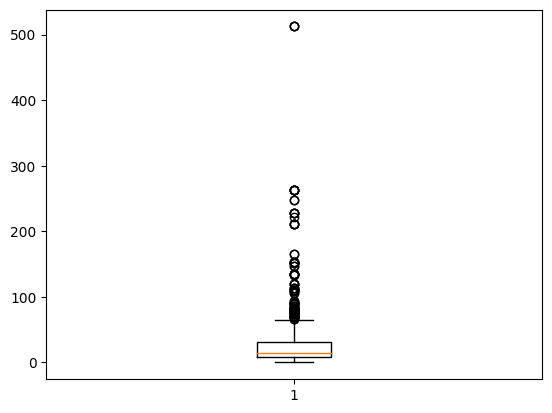

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(df.Fare)

Una **tabella di frequenza** di una variabile divide l'intervallo della variabile in segmenti equidistanti e ci dice quanti valori cadono in ciascun segmento.

In [7]:
# We cut the distribution in bucket
df['bins'] = pd.cut(df['Fare'], 10)

# We count how many times is frequent each bucket
a = df.groupby('bins').size()
a

bins
(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
dtype: int64

Un **istogramma** è un modo per visualizzare una tabella di frequenza, con i bin sull'asse x e il conteggio dei dati sull'asse y. <br>
Per la maggior parte dei set di dati, un istogramma creato dai dati sarà classificato come uno dei seguenti: <br>
- __Simmetrico__: un istogramma è simmetrico se ha un singolo picco e ha all'incirca lo stesso aspetto a sinistra del picco ea destra del picco.
- __Skewed right__ (*positivamente inclinato*): un istogramma è inclinato a destra (positivamente inclinato) se ha un singolo picco e i valori del set di dati si estendono molto più a destra del picco che a sinistra del picco .
- __Skewed left__ (*negativamente sbilanciato*): un istogramma è sbilanciato a sinistra (negativamente sbilanciato) se ha un singolo picco e i valori del set di dati si estendono molto più a sinistra del picco che a destra del picco .
- __Più picchi__: quando un istogramma mostra più picchi, in genere significa che i dati di due o più popolazioni vengono rappresentati graficamente insieme.

Una distribuzione di dati si dice simmetrica se esiste un valore che divide la distribuzione stessa in due parti, con gli elementi di ciascuna parte simmetrici dei corrispondenti elementi dell'altra parte. Se non esiste tale valore, la distribuzione è asimmetrica.

L'indice di asimmetria (skewness) misura la mancanza di simmetria della distribuzione di frequenza.

In particolare:
- Un indice di asimmetria positivo indica una distribuzione in cui i valori sono raggruppati nella parte dei valori bassi, con una lunga coda verso i valori maggiori: asimmetria a destra. Il grafico della distribuzione risulta allungato verso destra.
- Un indice di asimmetria negativo indica la situazione opposta: asimmetria a sinistra. Il grafico della distribuzione risulta allungato verso sinistra.

L'indice di curtosi misura il maggiore o minore appuntimento di una distribuzione di dati, rispetto alla distribuzione normale. Di conseguenza esso indica il maggiore o minore peso dei valori posti agli estremi della distribuzione (code), rispetto a quelli della parte centrale.

Una forma di distribuzione più appuntita rispetto a quella della distribuzione normale, è detta leptocurtica, e l'indice di curtosi risulta positivo. Una forma di distribuzione meno appuntita rispetto a quella della distribuzione normale, è detta platicurtica, e l’indice K di curtosi risulta negativo.
- Indice di curtosi K = 0: forma normale
- Indice di curtosi K > 0: forma leptocurtica
- Indice di curtosi K < 0: forma platicurtica

Skewness Distribution: 4.78
Kurtosis Distribution: 33.2


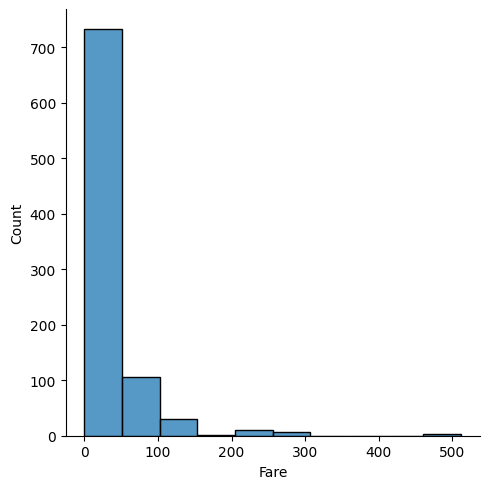

In [8]:
import seaborn as sns

dist = sns.displot(df.Fare, bins=10, kde=False)
print("Skewness Distribution:", round(stats.skew(df.Fare),2))
print("Kurtosis Distribution:", round(stats.kurtosis(df.Fare),2))

Un **grafico della densità** può essere pensato come un istogramma smussato, sebbene in genere sia calcolato direttamente dai dati attraverso una stima della densità del kernel

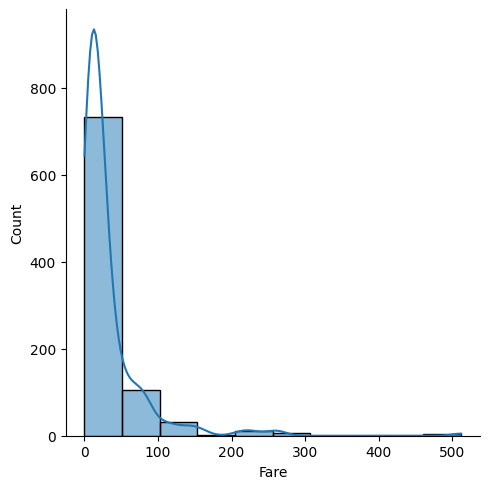

In [44]:
import seaborn as sns

hist_withf = sns.displot(df.Fare, bins=10, kde=True)

<a id='expl_bin_cat'></a>
#### Esplorare dati binari e categorici

Per i dati categoriali, semplici proporzioni o percentuali raccontano la storia dei dati. <br>
- **Modalità**: la categoria o il valore più comune in un set di dati <br>
- **Valore atteso**: quando le categorie possono essere associate a un valore numerico, fornisce un valore medio basato sulla probabilità di accadimento di una categoria. <br>
- **Grafici a barre**: la frequenza o la proporzione per ciascuna categoria tracciata come barre <br>
- **Grafici a torta**: la frequenza o la proporzione per ciascuna categoria tracciata come spicchi in una torta.

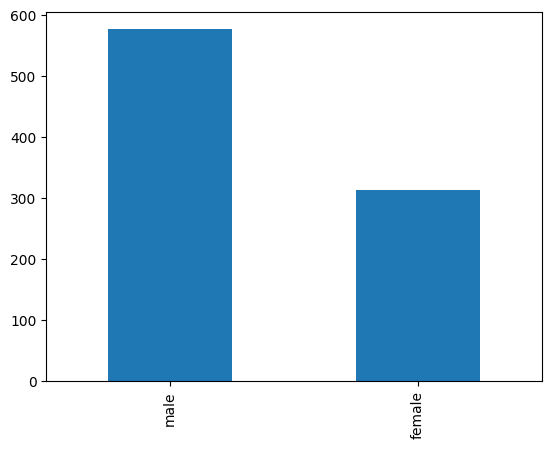

In [45]:
freq_table = df.Sex.value_counts()
xaxis = freq_table.index
value = freq_table.values

ax = freq_table.plot.bar(x=xaxis, y=value)

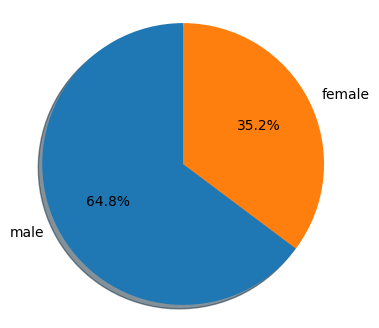

In [46]:
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<a id='correlation'></a>
#### Correlazione

Si dice che le variabili X e Y (ciascuna con dati misurati) siano **correlate positivamente** se valori alti di X vanno con valori alti di Y e valori bassi di X vanno con valori bassi di Y. Se valori alti di X vanno con valori bassi di Y, e viceversa, le variabili sono **correlate negativamente**. <br>
- **Coefficiente di correlazione**: metrica che misura la misura in cui le variabili numeriche sono associate tra loro (va da -1 a +1) <br>
- **Matrice di correlazione**: una tabella in cui le variabili sono visualizzate sia su righe che su colonne, e i valori di cella sono le correlazioni tra le variabili <br>
- **Scatterplot**: un grafico in cui l'asse x è il valore di una variabile e l'asse y il valore di un'altra

Il *coefficiente di correlazione*, che fornisce una stima della correlazione tra due variabili che giacciono sempre sulla stessa scala. Per calcolare il **coefficiente di correlazione di Pearson**, moltiplichiamo le deviazioni dalla media per la variabile 1 volte quelle per la variabile 2 e dividiamo per il prodotto delle deviazioni standard:
![Pearson](img/Pearson.png)
Il coefficiente di correlazione è sempre compreso tra +1 (*correlazione positiva perfetta*) e –1 (*correlazione negativa perfetta*); 0 indica nessuna correlazione.

In [47]:
print("Correlation Matrix:")
df.loc[:,['Pclass', 'Age','Fare']].corr()

Correlation Matrix:


,Pclass,Age,Fare
Pclass,1.000000,-0.369226,-0.549500
Age,-0.369226,1.000000,0.096067
Fare,-0.549500,0.096067,1.000000


Scatter plot between Fare and Passenger's Class


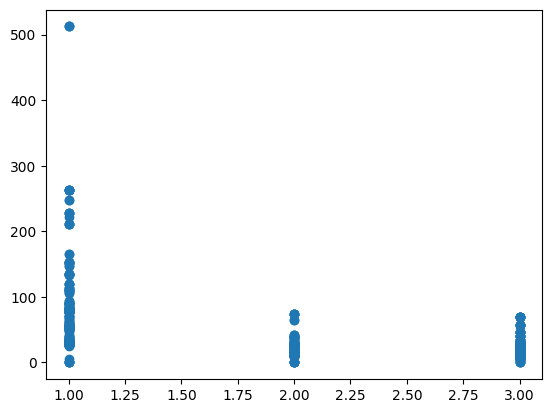

In [48]:
print("Scatter plot between Fare and Passenger's Class")
plt.scatter(df.Pclass, df.Fare)
plt.show()

Guardare i dati dalla matrice sopra può essere un po' noioso, tuttavia puoi aggirare questo problema visualizzando la matrice di correlazione da un grafico heatmap:

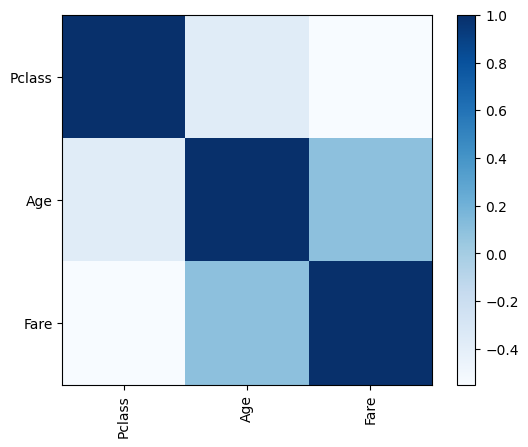

In [49]:
df_corr = df.loc[:,['Pclass', 'Age','Fare']]
plt.imshow(df_corr.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_corr.columns))]
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)
plt.show()

<a id='expl_var'></a>
#### Esplorare due o più variabili

Stimatori familiari come media e varianza esaminano le variabili una alla volta (**analisi univariata**). L'analisi di correlazione è un metodo importante che confronta due variabili (**analisi bivariata**). <br>
In questa sezione esamineremo ulteriori stime e grafici e più di due variabili (**analisi multivariata**). <br>
- **Tabelle di contingenza**: un conteggio di conteggi tra due o più variabili categoriali <br>
- **Binning esagonale**: un grafico di due variabili numeriche con i record raggruppati in esagoni <br>
- **Grafici di contorno**: un grafico che mostra la densità di due variabili numeriche come una mappa topografica <br>
- **Violino**: simile a un boxplot ma che mostra la stima della densità

#### Plottare dati numerici vs dati categorici

*Scatterplots are fine when there is a __relatively small number of data values__*. <br>
For datasets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. <br>
For example with a <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html'>Hexagonal binning</a>

In [50]:
fifa = pd.read_csv('data/data_fifa19.csv', index_col = 0)
fifa.head()
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

Scatter plot between Football player's Age and its Overall Score


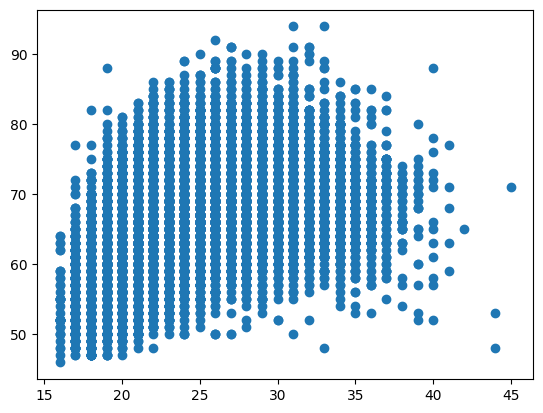

In [51]:
print("Scatter plot between Football player's Age and its Overall Score")
plt.scatter(fifa.Age, fifa.Overall)
plt.show()

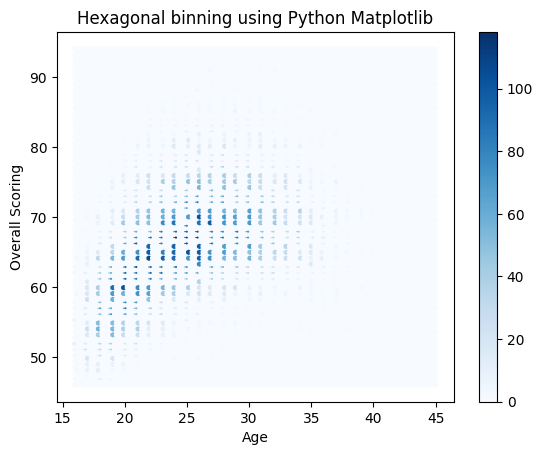

In [52]:
xData = fifa.Age
yData = fifa.Overall


# Plot the hexbin using the data genererated by numpy
plt.hexbin(xData, yData, gridsize=100, cmap='Blues')
plt.colorbar()
# Provide the title for the plot
plt.title('Hexagonal binning using Python Matplotlib')

# Give x axis label for the spike raster plot
plt.xlabel('Age')

# Give y axis label for the spike raster plot
plt.ylabel('Overall Scoring')

# Display the plot
plt.show()

Invece di tracciare punti, che apparirebbero come una nuvola scura monolitica, abbiamo raggruppato i record in contenitori esagonali e tracciati gli esagoni con un colore che indica il numero di record in quel contenitore.

Oppure possiamo usare il grafico <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html'>contours</a>. I contorni sono essenzialmente una mappa topografica a due variabili; ogni fascia di contorno rappresenta una specifica densità di punti, aumentando man mano che ci si avvicina a un *picco*. <br>
L'*intervallo di contorno* di una mappa di contorno è la differenza di elevazione tra le curve di livello successive. <br>
Più in generale, una *linea di contorno* per una funzione di due variabili è una curva che collega punti in cui la funzione ha lo stesso valore particolare.
![Contour](img/contour.png)

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 16.  4.  0.  4. 16. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


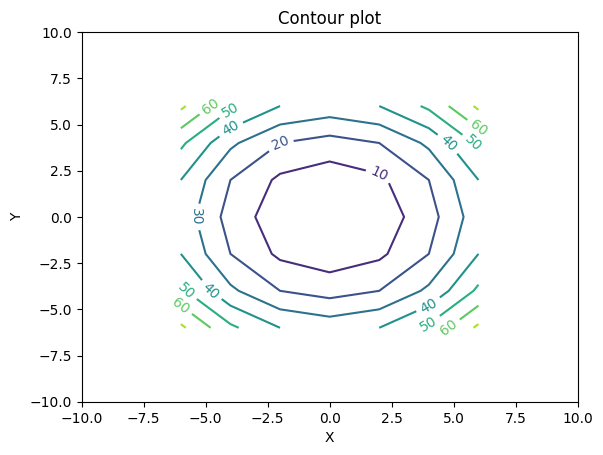

In [53]:
import numpy as np
import matplotlib.pyplot as plot
import pylab

# List of points in x axis
XPoints = []

# List of points in y axis
YPoints = []

# X and Y points are from -6 to +6 varying in steps of 2 
for val in range(-6, 8, 2):
    XPoints.append(val)
    YPoints.append(val)

# Z values as a matrix
ZPoints     = np.ndarray((7,7))

# Populate Z Values (a 7x7 matrix) - For a circle x^2+y^2=z    
for x in range(0, len(XPoints)):
    for y in range(0, len(YPoints)):
        ZPoints[x][y] = (XPoints[x]* XPoints[x]) + (YPoints[y]*YPoints[y])

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 36. 36. 36. 36. 36. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


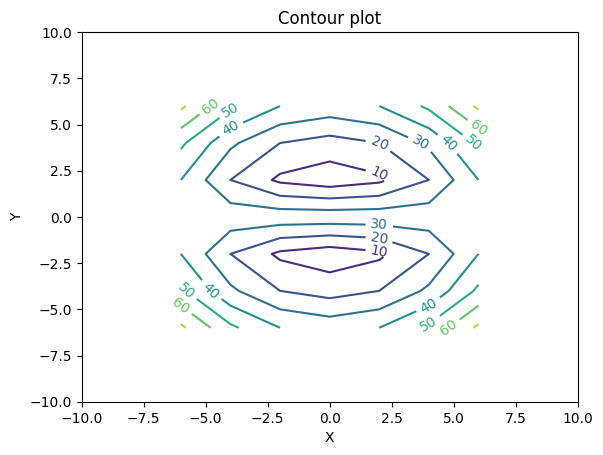

In [54]:
# Try to change ZPoints for understanding the changes in the chart
ZPoints[:][3] = [36,36,36,36,36,36,36]

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

#### Due variabili categoriche

Un modo utile per riassumere due variabili categoriali è una **tabella di contingenza**, una tabella di conteggi per categoria.

In [55]:
pd.crosstab(fifa.Position, fifa['Preferred Foot']).head()

Preferred Foot,Left,Right
Position,,
CAM,256,702
CB,341,1437
CDM,126,822
CF,18,56
CM,249,1145


In [56]:
pd.crosstab(fifa.Position, fifa['Preferred Foot'], normalize='index').head()

Preferred Foot,Left,Right
Position,,
CAM,0.267223,0.732777
CB,0.191789,0.808211
CDM,0.132911,0.867089
CF,0.243243,0.756757
CM,0.178623,0.821377


###### Categorical and Numeric Data

I boxplot sono un modo semplice per confrontare visivamente *le distribuzioni di una variabile numerica raggruppate in base a una variabile categoriale*.

Nella tabella seguente confrontiamo la distribuzione dei punteggi complessivi raggruppati in base alla posizione del calciatore.

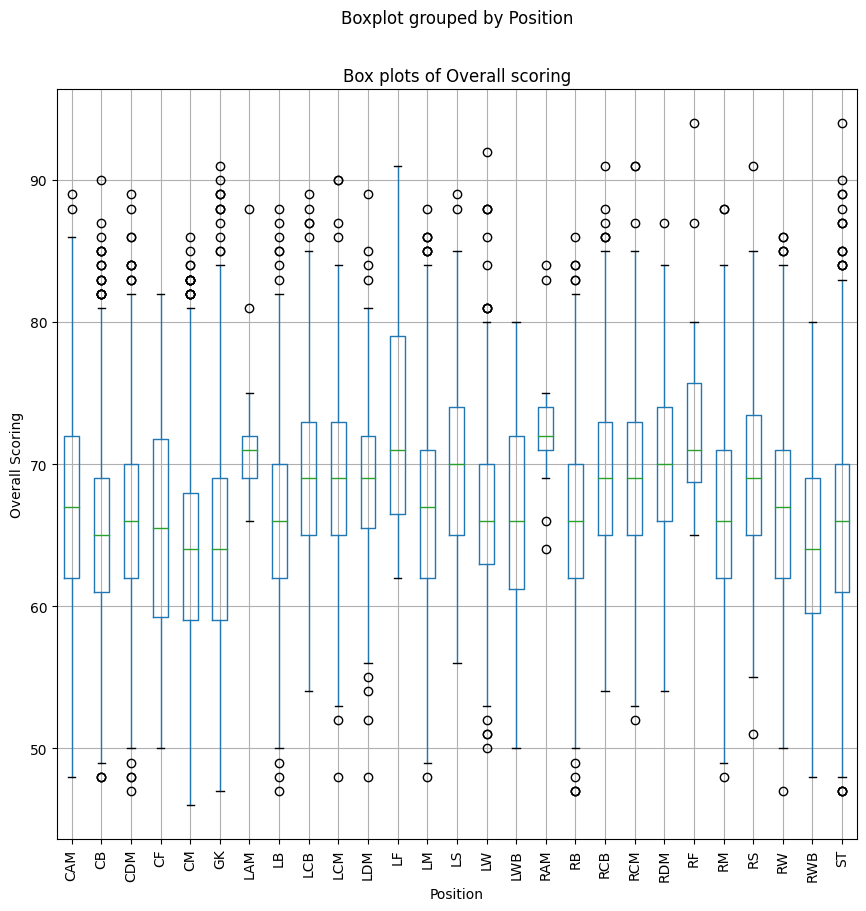

In [57]:
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
fifa_filter[['Overall','Position']].boxplot(by = 'Position', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of Overall scoring') # Give the plot a main title
ax.set_xlabel('Position') # Set text for the x axis
ax.set_ylabel('Overall Scoring')# Set text for y axis
plt.xticks(rotation='vertical')
plt.show()

È possibile notare che RAM è la posizione con il punteggio complessivo mediano più alto.

Un **grafico violino** è un miglioramento del boxplot e traccia **la stima della densità sull'asse y**. <br>
La densità viene riflessa e capovolta e la forma risultante viene riempita, creando un'immagine simile a un violino.
<br>
Il vantaggio di un diagramma di violino è che può mostrare sfumature nella distribuzione che non sono percepibili in un diagramma a scatole, poiché mostra la densità di probabilità dei dati a valori diversi, solitamente attenuati da uno stimatore di densità del kernel.

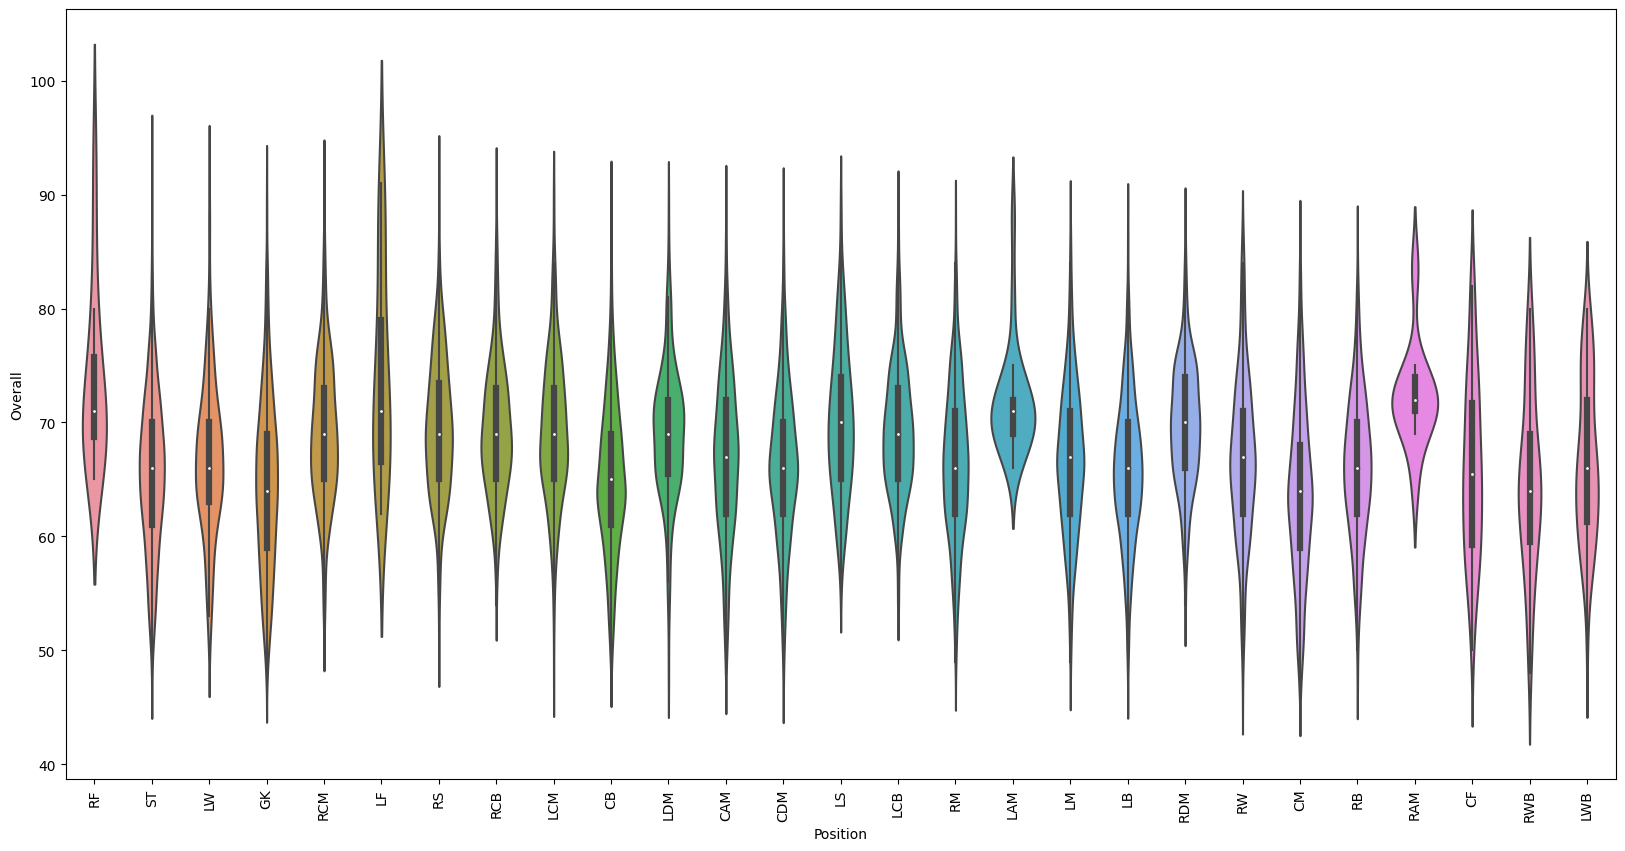

In [58]:
import seaborn as sns

fig, ax = plt.subplots(figsize =(20, 10)) 
sns.violinplot(ax = ax, x = fifa_filter['Position'], y=fifa_filter['Overall'] ) 
plt.xticks(rotation='vertical')
plt.show()

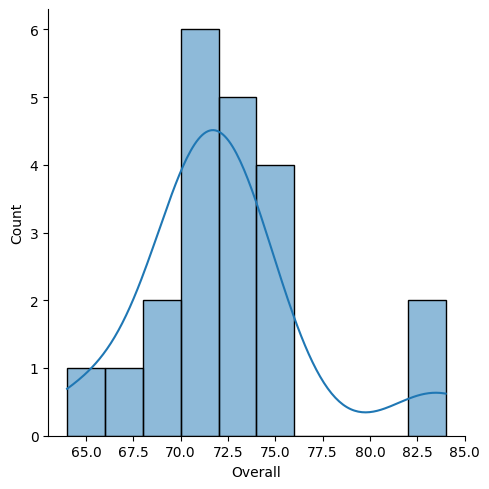

In [59]:
subsample = fifa_filter.loc[fifa_filter['Position']=='RAM', 'Overall']
plt = sns.displot(subsample, bins=10, kde = True)

###### Visualizing Multiple Variables

I tipi di grafici utilizzati per confrontare due variabili - grafici a dispersione, binning esagonale e boxplot - sono prontamente estesi a più variabili attraverso la nozione di *condizionamento*. <br>

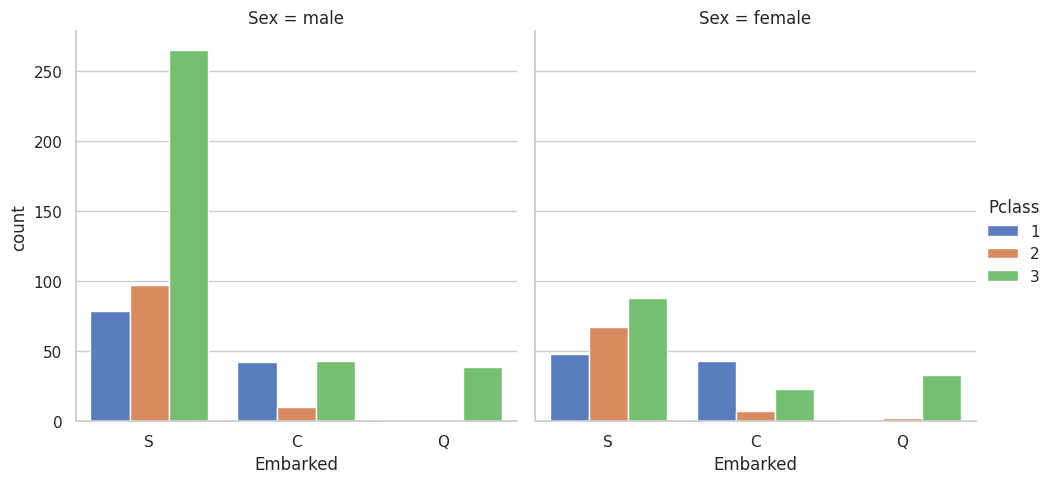

In [60]:
# Draw a nested barplot to show embarked for class and sex
sns.set(style="whitegrid")

g = sns.catplot(x="Embarked", hue="Pclass", col="Sex", kind="count", data=df, palette="muted")

<a id='engineering'></a>
# Ingegneria delle feature e trasformazioni

- [Dati categorici](#categorical)<a href='#categorical'></a>
    - [Dict Vectorizer](#dict-vectorizer)<a href='#dict-vectorizer'></a>
    - [Ordinal Encoder](#ordinal-encoder)<a href='#ordinal-encoder'></a>
    - [One Hot Encoder](#one-hot-encoder)<a href='#one-hot-encoder'></a>
    - [Label Encoder](#label-encoder)<a href='#label-encoder'></a>
- [Dati numerici](#numerical)<a href='#numerical'></a>

Dopo la fase di organizzazione e manipolazione dei dati e dopo la fase di analisi esplorativa, è importante manipolare correttamente i dati per trasformarli e adattarli alla creazione del modello.

Questo processo è chiamato anche Feature Engineering ed è un aspetto fondamentale nel mondo del Machine Learning.

Questa attività è fondamentale e importante perché alcuni modelli non possono ragionare ad esempio utilizzando sequenze di token o stringhe, ma solo con numeri. \
Inoltre, per alcune tipologie di dati (categorici, immagini, ma anche numerici) è fondamentale applicare delle trasformazioni per migliorare l'efficacia di un modello nel generare una rappresentazione.

<a id='categorical'></a>
## Dati Categorici

Iniziamo definendo un set di dati di esempio

In [3]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': 'Milano', 'temperature': 18.},
    {'city': 'Roma', 'temperature': 20.},
    {'city': 'Parigi', 'temperature': 16.},
    {'city': 'Biella', 'temperature': 13},
    ]

df = pd.DataFrame(measurements)
df

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0
3,Milano,18.0
4,Roma,20.0
5,Parigi,16.0
6,Biella,13.0


Puoi con Pandas selezionare solo le colonne categoriali all'interno di un set di dati.

Attenzione: in pandas gli oggetti possono anche essere categorie (es. stringhe).

In [4]:
result = df.select_dtypes(include=['object', 'category'])
result

,city
0,Dubai
1,London
2,San Francisco
3,Milano
4,Roma
5,Parigi
6,Biella


<a id='dict-vectorizer'></a>
### DictVectorizer

Immagina di dover esplorare un dataset di temperatura, in questo caso avrai sicuramente delle caratteristiche categoriche che fanno riferimento ad esempio alla città dove è stata misurata la temperatura oppure al tipo di sensore ecc...

Una delle trasformazioni più semplici in questo caso sarebbe quella di creare un set di dati fatto a mano di possibili trasformazioni da applicare all'interno del nostro set di dati.

Questa operazione è molto comoda se si lavora con categorie piccole (formate cioè da pochi elementi), come in questo caso.

Possiamo quindi applicare una trasformazione chiamata: **DictVectorizer**.

In [5]:
# Retrasform the dataframe to dictionary
data = df.T.to_dict().values()

In [6]:
data

dict_values([{'city': 'Dubai', 'temperature': 33.0}, {'city': 'London', 'temperature': 12.0}, {'city': 'San Francisco', 'temperature': 18.0}, {'city': 'Milano', 'temperature': 18.0}, {'city': 'Roma', 'temperature': 20.0}, {'city': 'Parigi', 'temperature': 16.0}, {'city': 'Biella', 'temperature': 13.0}])

In [7]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

# Warning, you cannot use this with pandas df
result = vec.fit_transform(data).toarray()

data_vect = pd.DataFrame(data=result, columns=vec.get_feature_names_out())
data_vect

,city=Biella,city=Dubai,city=London,city=Milano,city=Parigi,city=Roma,city=San Francisco,temperature
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0


Fai attenzione però, usando questa tecnica crei un sottoelenco per ogni feature, quindi all'aumentare del numero di feature disponibili, il set di dati cresce in modo sproporzionato.

<a id='ordinal-encoder'></a>
### Ordinal Encoder

Un altro modo per trasformare le caratteristiche categoriche che è sempre molto intuitivo è trasformarle come se fossero un **elenco ordinato di possibilità** che può essere espresso sotto forma di numero intero.

Facciamo un esempio:

In [66]:
#Retrasform the dataframe to list
cities = df.city.T.to_dict().values()

cities_list = np.array(list(cities))
cities_list

array(['Dubai', 'London', 'San Francisco', 'Milano', 'Roma', 'Parigi',
       'Biella'], dtype='<U13')

ATTENZIONE: Sklearn lavora molto con gli array numpy, quindi si consiglia di utilizzare frequentemente questo tipo di rappresentazione, invece di utilizzare i normali elenchi o dizionari Python. Inoltre spesso non è compatibile con Panda. Quindi cerca sempre di capire quali dati hai in input e cosa vuoi trasformare.

NumPy è una libreria per calcoli di array efficienti, modellata su Matlab.

Gli array differiscono dalle semplici liste Python nel modo in cui vengono archiviati e gestiti. Gli elementi dell'array rimangono insieme nella memoria, quindi è possibile accedervi rapidamente. NumPy supporta anche la subindicizzazione rapida, ad esempio a[0, :, 2] fornisce tutti gli elementi dell'array il cui primo indice è 0 e il terzo indice è 2.

Inoltre, NumPy fornisce funzioni matematiche vettorializzate.

Quando, ad esempio, chiami numpy.sin(a), la funzione seno viene applicata a ogni elemento dell'array a.

Questo viene fatto usando il codice C compilato, quindi funziona molto più velocemente di un ciclo for Python, anche più veloce delle comprensioni di liste.

SciPy offre un ampio menu di librerie per il calcolo scientifico, come integrazione, interpolazione, elaborazione del segnale, algebra lineare, statistica, ecc. È costruito sull'infrastruttura di Numpy.

In [67]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
enc.fit(cities_list.reshape(-1,1))

OrdinalEncoder()

In [68]:
enc.transform([['Dubai'],['Roma']])

array([[1.],
       [5.]])

Ma attenzione!!!! Se provo una città che non esiste nella mia serie, non funzionerà. \
Così come l'ordine di codifica è molto importante

In [69]:
enc.transform(['Rome'])

ValueError: X does not contain any features, but OrdinalEncoder is expecting 1 features

<a id='one-hot-encoder'></a>
### OneHotEncoder

Un'altra possibilità per convertire caratteristiche categoriche in caratteristiche utilizzabili con gli stimatori scikit-learn consiste nell'utilizzare una codifica one-of-K, nota anche come codifica one-hot o fittizia.

Questo metodo è una delle trasformazioni più famose nella modellazione dell'apprendimento automatico per caratteristiche categoriche

Questo tipo di codifica può essere ottenuto con OneHotEncoder, che trasforma ogni caratteristica categoriale con n_categorie possibili valori in n_categorie caratteristiche binarie, con una di esse 1 e tutte le altre 0.

Per creare una codifica a caldo puoi utilizzare un metodo Pandas o utilizzare SKLearn

In [70]:
df_oneHot = df.copy()
df_oneHot

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0
3,Milano,18.0
4,Roma,20.0
5,Parigi,16.0
6,Biella,13.0


In [71]:
df_oneHot = pd.get_dummies(df_oneHot,prefix=['city'], drop_first=True)
df_oneHot

,temperature,city_Dubai,city_London,city_Milano,city_Parigi,city_Roma,city_San Francisco
0,33.0,1,0,0,0,0,0
1,12.0,0,1,0,0,0,0
2,18.0,0,0,0,0,0,1
3,18.0,0,0,1,0,0,0
4,20.0,0,0,0,0,1,0
5,16.0,0,0,0,1,0,0
6,13.0,0,0,0,0,0,0


<a id='label-encoder'></a>
### Label Encoder

LabelEncoder converte **ogni classe sotto la caratteristica specificata in un valore numerico.**

LabelEncoder è molto utile perché permette di ottenere un dataframe in output, senza dover effettuare alcuna trasformazione. Restituisce valori diversi per classi diverse sempre all'interno della stessa colonna.

In [72]:
cities = df.city.tolist()
df_complete = df.copy()

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_complete['city'])
list(le.classes_)

['Biella', 'Dubai', 'London', 'Milano', 'Parigi', 'Roma', 'San Francisco']

In [74]:
#transform into integers
transformation = le.transform(df['city']) 
transformation

array([1, 2, 6, 3, 5, 4, 0])

In [75]:
# try to invert a transformation using the object
list(le.inverse_transform([2, 2, 1, 5]))

['London', 'London', 'Dubai', 'Roma']

In [76]:
# apply le on categorical feature columns
df_complete['city_transformed'] = list(transformation)

In [77]:
df_complete

,city,temperature,city_transformed
0,Dubai,33.0,1
1,London,12.0,2
2,San Francisco,18.0,6
3,Milano,18.0,3
4,Roma,20.0,5
5,Parigi,16.0,4
6,Biella,13.0,0


<a id='numerical'></a>
## Dati Numerici

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.

Yhey might behave badly if the individual features do not more or less look like **standard normally distributed data**: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

To test the distribution of the data if a feature or a set it's (for example) standard normally distributed 

### StandardScaler

In [78]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],[3,5,12],[ 2.,  0.,  0.],[ 0.,  1., -1.],[5,12,67],[42,5,3]])
X_train

array([[ 1., -1.,  2.],
       [ 3.,  5., 12.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 5., 12., 67.],
       [42.,  5.,  3.]])

In [79]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [80]:
print(f'Mean:  {scaler.mean_}')
print(f'Scale: {scaler.scale_}')

Mean:  [ 8.83333333  3.66666667 13.83333333]
Scale: [14.91550275  4.38431548 24.14826886]


In [81]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.52518064, -1.06440029, -0.49002823],
       [-0.39109197,  0.30411437, -0.07591987],
       [-0.45813631, -0.83631451, -0.5728499 ],
       [-0.59222498, -0.60822874, -0.61426073],
       [-0.25700329,  1.9007148 ,  2.20167611],
       [ 2.22363719,  0.30411437, -0.44861739]])

I dati scalati hanno media zero e varianza unitaria.

In [82]:
print(f'Media scalata: {X_scaled.mean(axis=0)}')

Media scalata: [0.00000000e+00 7.40148683e-17 0.00000000e+00]


In [83]:
print(f'Standard Deviation: {X_scaled.std(axis=0)}')

Standard Deviation: [1. 1. 1.]


### MinMaxScaler

Una standardizzazione alternativa consiste nel ridimensionare le caratteristiche in modo che si trovino tra un dato valore minimo e massimo, spesso tra zero e uno, o in modo che il valore assoluto massimo di ciascuna caratteristica sia ridimensionato alla dimensione dell'unità. Ciò può essere ottenuto utilizzando rispettivamente MinMaxScaler.

La motivazione per utilizzare questo ridimensionamento include la robustezza per deviazioni standard molto piccole delle funzionalità e la conservazione di zero voci in dati sparsi.

In [84]:
X_train

array([[ 1., -1.,  2.],
       [ 3.,  5., 12.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 5., 12., 67.],
       [42.,  5.,  3.]])

In [85]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.02380952, 0.        , 0.04411765],
       [0.07142857, 0.46153846, 0.19117647],
       [0.04761905, 0.07692308, 0.01470588],
       [0.        , 0.15384615, 0.        ],
       [0.11904762, 1.        , 1.        ],
       [1.        , 0.46153846, 0.05882353]])

È possibile introspezionare gli attributi dello scaler per scoprire l'esatta natura della trasformazione appresa sui dati di addestramento:

In [86]:
print(f'Scale: {min_max_scaler.scale_}')
print(f'Min: {min_max_scaler.min_}')

Scale: [0.02380952 0.07692308 0.01470588]
Min: [0.         0.07692308 0.01470588]


### Normalizzazione

La normalizzazione è il processo di ridimensionamento di singoli campioni per avere una norma unitaria. Questo processo può essere utile se si prevede di utilizzare una forma quadratica come il prodotto scalare o qualsiasi altro kernel per quantificare la somiglianza di qualsiasi coppia di campioni.

In [87]:
X_normalized = preprocessing.normalize(X_train)
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 0.22485951,  0.37476584,  0.89943803],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 0.07326056,  0.17582536,  0.98169157],
       [ 0.99049992,  0.11791666,  0.07074999]])

<a id='dimensionality'></a>
# Riduzione della dimensionalità

- [Principal Component Analysis - PCA](#pca)<a href='#pca'></a>
- [Isomap](#isomap)<a href='#isomap'></a>

Che cos'è la **riduzione della dimensionalità?**

Molti problemi di Machine Learning coinvolgono migliaia di funzionalità, avere un numero così elevato di funzionalità porta con sé molti problemi, i più importanti sono:

- Rende l'allenamento estremamente lento
- Rende difficile trovare una buona soluzione

Questa è nota come la **maledizione della dimensionalità** e la Riduzione della dimensionalità è il processo di riduzione del numero di caratteristiche a quelle più rilevanti in termini semplici.

La riduzione della dimensionalità fa perdere alcune informazioni, tuttavia poiché la maggior parte dei processi di compressione presenta alcuni inconvenienti, anche se otteniamo l'addestramento più velocemente, facciamo peggiorare leggermente le prestazioni del sistema, ma va bene così!

“a volte ridurre la dimensionalità può filtrare parte del rumore presente e alcuni dei dettagli non necessari”.


La maggior parte delle applicazioni di riduzione della dimensionalità sono utilizzate per:
- Compressione dati
- Riduzione del rumore
- Classificazione dei dati
- Visualizzazione dati

Uno degli aspetti più importanti della riduzione della dimensionalità è la visualizzazione dei dati.

Dovendo ridurre la dimensionalità a due o tre, è possibile visualizzare i dati su un grafico 2d o 3d, il che significa che è possibile ottenere informazioni importanti analizzando questi modelli in termini di cluster e molto altro.

**Principali approcci per la riduzione della dimensionalità**
I due approcci principali per ridurre la dimensionalità: proiezione e apprendimento multiplo.


- **Proiezione:** Questa tecnica si occupa di proiettare ogni punto dati che è in alta dimensione, su un sottospazio adatto spazio dimensionale inferiore in modo da preservare approssimativamente le distanze tra i punti.

- **Apprendimento collettore:** molti algoritmi di riduzione della dimensionalità funzionano modellando il collettore su cui si trova l'istanza di addestramento; questo si chiama apprendimento multiplo.
     Si basa sull'ipotesi o ipotesi molteplice, che sostiene che la maggior parte dei set di dati ad alta dimensione del mondo reale si trovano vicino a una varietà di dimensioni molto inferiori, questa ipotesi nella maggior parte dei casi si basa sull'osservazione o sull'esperienza piuttosto che sulla teoria o sulla pura logica.
    
Quando pensi a una varietà, suggerirei di immaginare un foglio di carta: questo è un oggetto bidimensionale che vive nel nostro familiare mondo tridimensionale e può essere piegato o arrotolato in quelle due dimensioni. Nel linguaggio dell'apprendimento molteplice, possiamo pensare a questo foglio come a una varietà bidimensionale incorporata in uno spazio tridimensionale.

Ruotare, riorientare o allungare il pezzo di carta nello spazio tridimensionale non cambia la geometria piatta della carta: tali operazioni sono simili a incorporamenti lineari. Se pieghi, arricci o accartocci la carta, è ancora una varietà bidimensionale, ma l'incorporamento nello spazio tridimensionale non è più lineare.
    
Informazioni sull'apprendimento multiplo
- https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction
- https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
- https://scikit-learn.org/stable/modules/manifold.html

### Riduzione

Durante la fase di raccolta dei dati, il tuo obiettivo era registrare quanti più dati possibili sulle tue osservazioni poiché non sai mai quali caratteristiche finiranno per essere quelle d'oro che consentiranno al tuo algoritmo di apprendimento automatico di avere successo. Per questo motivo, di solito ci sono alcune funzionalità ridondanti o addirittura scadenti nel tuo set di dati.

*Per essere efficaci, molti algoritmi di machine learning hanno bisogno che i loro dati di input siano perspicaci, discriminanti e indipendenti.*

In questo taccuino, scopriremo i metodi per far sì che i tuoi dati si comportino in quel modo usando i trasformatori.

Ciò contribuirà a migliorare la tua conoscenza dei tuoi dati, nonché a migliorare le prestazioni del tuo algoritmo di apprendimento automatico.

Se desideri un'implementazione grezza degli algoritmi: https://github.com/SasCezar/DimensionalityReduction

<a id='pca'></a>
## Principal Component Analysis - PCA
PCA e altri metodi di riduzione della dimensionalità hanno tre usi principali: <br>
1) Ridurre la dimensionalità e quindi la complessità del tuo set di dati; <br>
2) Pre-elaborare i dati in preparazione per altri compiti di apprendimento supervisionato, come la regressione e la classificazione; <br>
3) Per facilitare la visualizzazione dei dati.

![alt text](img/Principal_Components_print.png "PCA")

L'analisi dei componenti principali (PCA) è una trasformazione che tenta di convertire le caratteristiche eventualmente correlate in un insieme di caratteristiche linearmente non correlate.

In molti set di dati del mondo reale, non siamo a conoscenza di ciò che deve essere specificamente misurato per affrontare il problema che guida la nostra raccolta di dati.

Quindi, invece, raccogliamo semplicemente qualsiasi caratteristica che possiamo misurare, di solito risultando in una dimensionalità superiore (*molte caratteristiche del set di dati*) rispetto a ciò che è veramente necessario. Questo non è auspicabile, ma è l'unico modo affidabile per assicurarci di acquisire la relazione modellata dai nostri dati.


Se abbiamo ragione di credere che la domanda che vogliamo risolvere possa essere risolta utilizzando un sottoinsieme delle nostre caratteristiche raccolte, o se le caratteristiche che abbiamo raccolto sono in realtà molte osservazioni indirette di qualche proprietà intrinseca che non possiamo o non sappiamo come misurare direttamente , allora la riduzione della dimensionalità potrebbe funzionare per noi.

**L'approccio di PCA alla riduzione della dimensionalità consiste nel derivare un insieme di gradi di libertà che possono quindi essere utilizzati per riprodurre la maggior parte della variabilità dei nostri dati.**

Per PCA, trova prima il centro dei nostri dati, in base alle sue caratteristiche numeriche.

Successivamente, cercherà la direzione con la maggiore varianza o la più ampia diffusione di valori. Quella direzione è il vettore della componente principale, quindi viene aggiunta a un elenco. Cercando più direzioni di varianza massima che sono ortogonali a tutti i vettori calcolati in precedenza, è possibile aggiungere all'elenco più componenti principali.

Questo insieme di vettori forma un nuovo spazio di funzionalità che può rappresentare i nostri campioni con.

PCA garantisce che ogni nuova vista (caratteristica) calcolata sia ortogonale o linearmente indipendente da tutte quelle calcolate in precedenza, riducendo al minimo queste sovrapposizioni. PCA ordina anche le caratteristiche per importanza, assumendo che maggiore è la varianza espressa in una caratteristica, più importante è detta caratteristica.

Con le funzionalità appena calcolate ordinate per importanza, l'eliminazione delle funzionalità meno importanti nell'elenco riduce in modo intelligente il numero di dimensioni necessarie per rappresentare il set di dati, con una perdita minima di informazioni.


Il gruppo rimanente di funzionalità sono i *componenti principali* e sono la migliore combinazione di funzionalità possibile e linearmente indipendente che possiamo utilizzare per descrivere i tuoi dati.

![alt text](img/Principal_Component_Analysis_print.png "PCA")

You can also follow this examples to have more explanations about PCA
- https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca

Proviamo a capire meglio la PCA con un esempio:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math, random

from sklearn import preprocessing

plt.style.use('ggplot')

In [89]:
# Defining a function for scaling the features of a dataset

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:
    
    scaled = preprocessing.StandardScaler(with_mean = False).fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    
    return scaled

SKLearn contiene molti metodi per trasformare le nostre feature ridimensionandole, un tipo di [pre-elaborazione](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)):
- [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
- [`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)
- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [`MaxAbsScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
<br>

Tuttavia, per essere efficaci in PCA, ci sono alcuni requisiti che devono essere soddisfatti e che guideranno la selezione del tuo scaler. **PCA richiede che i nostri dati siano standardizzati**, in altre parole, *la media dovrebbe essere uguale a 0 e dovrebbe avere una varianza unitaria*.

Per capire perché è importante ridimensionare le funzionalità, vedere questi collegamenti:
- https://www.researchgate.net/post/In_which_case_data_need_to_be_normalized_before_PCA_Cluster_analysis
- https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca/69159
- https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance
- https://www.quora.com/Why-is-it-beneficial-to-center-and-normalize-the-data-before-running-Principal-Component-Analysis-on-it

Il normale `Normalizer()` di SKLearn non azzera la media dei tuoi dati, ma li blocca solo, quindi potrebbe essere inappropriato da usare a seconda dei tuoi dati. `MinMaxScaler` e `MaxAbsScaler` non riescono entrambi a impostare una varianza unitaria, quindi non li userai neanche qui. `RobustScaler` può funzionare, sempre a seconda dei tuoi dati (fai attenzione ai valori anomali!). Quindi, per questo compito, useremo `StandardScaler`.§

In [90]:
# Defining a function for visualizations

def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax


In [91]:
scaleFeatures = True

Carica il set di dati per eseguire un'analisi PCA. Utilizzeremo il set di dati di [Chronic Kidney Disease](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

In [92]:
kidn_dis = pd.read_csv('data/kidney_disease.csv')
kidn_dis.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [93]:
kidn_dis.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [94]:
# Investigating the main characteristic of the dataset

print("Shape of the dataset:", kidn_dis.shape)


Shape of the dataset: (400, 26)


In [95]:
kidn_dis.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [96]:
kidn_dis.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [97]:
kidn_dis.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [98]:
# Count na
kidn_dis.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [99]:
# Drop the id column
kidn_dis = kidn_dis.drop('id', axis=1)

# Drop any na
kidn_dis = kidn_dis.dropna(axis=0)
kidn_dis.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


**Fai attenzione alle righe dell'indice!** Dopo che un dropna alcune righe sono state cancellate, è meglio sempre fare un reset_index:

In [100]:
kidn_dis.reset_index(inplace=True)
kidn_dis.head()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [101]:
kidn_dis.isnull().sum()

index             0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [102]:
print("Dopo aver eliminato gli NA, le righe del dataset sono: ", kidn_dis.shape[0])

Dopo aver eliminato gli NA, le righe del dataset sono:  158


L'effettiva funzionalità dell'etichetta verrà rimossa prima dell'esecuzione del PCA, poiché non è supervisionata.<br>
Stiamo solo etichettando per colore in modo da poter vedere gli effetti della PCA:

In [103]:
# We define color red if the record is 'ckd' for the features classification, while green if it is 'notckd'
labels = ['red' if i=='ckd' else 'green' for i in kidn_dis.classification]

Per semplicità di calcolo, rimuoveremo delle colonne mantenendo solo quelel numeriche:

In [104]:
kidn_dis_2 = kidn_dis.loc[:, ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']]
kidn_dis_2.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
1,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5
2,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8
3,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6
4,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7


In [105]:
kidn_dis_2.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
dtype: object

PCA Opera in base alla varianza. Dominerà la variabile con la varianza maggiore.

In [106]:
kidn_dis_2.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


Ogni deviazione standard è molto diversa l'una dall'altra; quindi è necessario ridimensionare i dati:

In [107]:
df = kidn_dis_2
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
dtype: float64
New Describe:
               age          bp          sg          al          su         bgr  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     3.205267    6.647298  186.056041    0.566122    0.312233    2.028946   
std      1.003180    1.003180    1.003180    1.003180    1.003180    1.003180   
min      0.388021    4.488347  183.342676    0.000000    0.000000    1.081348   
25%      2.538305    5.386016  186.079134    0.000000    0.000000    1.498440   
50%      3.265844    7.181355  186.079134    0.000000    0.000000    1.784225   
75%      3.880211    7.181355  186.991287    0.709899    0.000000    2.035252   
max      5.367625    9.874362  186.991287    2.839596    6.166608    7.569438   

               bu          sc        

Per iniziare, **importa PCA da sklearn.decomposition** e quindi crea una nuova istanza del modello impostando il parametro *n_components* sul numero di dimensioni che desideri mantenere. Questo valore deve essere inferiore o uguale al numero di caratteristiche nel nostro set di dati originale, poiché ogni componente calcolato è una combinazione lineare delle nostre caratteristiche originali. <br>
Il secondo parametro, *svd_solver*, indica se sui nostri dati deve essere eseguita una decomposizione completa del valore singolare o una scomposizione casuale troncata. Se decidiamo di utilizzare randomized, assicurati di seminare la variabile random_state ogni volta che intendiamo produrre risultati sostituibili.

Una volta adattato il modello al nostro dataframe, possiamo usarlo per trasformare le osservazioni del nostro set di dati (o qualsiasi altra osservazione che condivida il suo spazio delle caratteristiche) nello spazio delle caratteristiche del componente principale appena calcolato con **.transform()** metodo. <br>
Questa trasformazione è bidirezionale, quindi possiamo recuperare i nostri valori di funzionalità originali utilizzando **.inverse_transform()** purché non eliminiamo alcun componente. Se anche un solo componente è stato rimosso, dopo aver eseguito la trasformazione inversa tornando allo spazio delle caratteristiche regolari, ci saranno alcuni segni di perdita di informazioni proporzionali a quale componente è stato eliminato.

Esegui [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) sul nostro set di dati, riducendolo a 2 componenti principali.

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)

Ci sono alcuni altri interessanti attributi del modello che SciKit-Learn ci espone dopo che abbiamo addestrato il nostro modello PCA con il metodo .fit(): <br>
- **components_**: questi sono i nostri principali vettori di componenti e sono combinazioni lineari delle nostre caratteristiche originali. In quanto tali, esistono all'interno dello spazio delle caratteristiche del nostro set di dati originale.
- **explained_variance_**: questa è la quantità calcolata di varianza che esiste nelle componenti principali appena calcolate.
- **explained_variance_ratio_**: versione normalizzata di *explained_variance_* per quando il nostro interesse è per le probabilità.

In [109]:
pca.explained_variance_ratio_

array([0.46887433, 0.11861083])

Features by importance:
 [(3.742707961689755, 'bgr'), (3.6582171461003505, 'su'), (3.301055817719967, 'sc'), (3.213562778109231, 'bu'), (3.0289895717843356, 'hemo'), (3.005954104973676, 'al'), (2.7191175570104846, 'sg'), (2.679624784530987, 'sod'), (2.1807533403156873, 'age'), (1.5558908768066337, 'bp'), (1.0207934019176794, 'pot')]


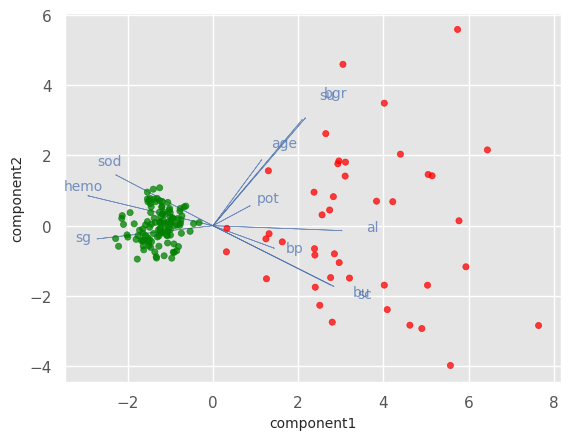

In [110]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [111]:
T.head()

,component1,component2
0,3.204188,-1.491743
1,2.799523,-2.747285
2,3.109582,1.810783
3,4.219809,0.684029
4,2.849842,-0.800630


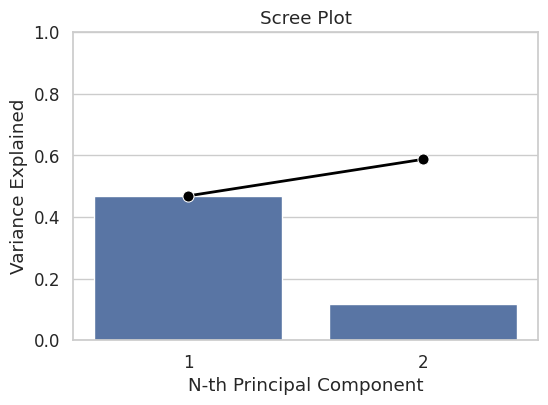

In [114]:
# Scree Plot
import seaborn as sns

PC_components = np.arange(pca.n_components_) + 1

_ = sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(6, 4))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Dopo aver eseguito un PCA, perderemo l'intestazione del dataframe, quindi potrebbe essere difficile capire quali caratteristiche del set di dati potrebbero descrivere un'ipotetica relazione lineare tra i dati.


Per interpretare ogni componente, dobbiamo calcolare le correlazioni tra i dati originali e ogni componente principale.

Queste correlazioni sono ottenute utilizzando la procedura di correlazione. Nell'enunciato variabile includiamo le due componenti principali, "component1 e component2", oltre a tutte le undici variabili originali.

Noteremo che se guardiamo ai componenti principali stessi, allora non c'è correlazione tra i componenti.

In [115]:
# Possiamo concatenare il dataframe della PCA a quello originario
df_corr = pd.concat([T, df], axis=1)

In [116]:
df_corr.head()

,component1,component2,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,3.204188,-1.491743,3.104169,6.283685,183.342676,2.839596,0.000000,1.807396,1.185307,1.238648,14.868030,0.721432,3.898271
1,2.799523,-2.747285,3.427520,8.079024,186.079134,1.419798,0.000000,1.081348,2.264782,2.346912,15.269869,1.067719,3.306569
2,3.109582,1.810783,4.074221,6.283685,184.254829,2.129697,0.000000,5.870176,1.269971,0.880092,17.546955,1.212005,3.759047
3,4.219809,0.684029,4.397572,7.181355,184.254829,2.129697,2.466643,2.425310,1.904957,1.336436,17.413009,1.846865,1.949135
4,2.849842,-0.800630,3.944881,7.181355,185.166981,1.419798,0.000000,2.672475,3.132596,1.271244,18.082740,1.500578,2.680061


In [117]:
corr_matrix = df_corr.corr()
corr_matrix

,component1,component2,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
component1,1.000000e+00,-6.555192e-17,0.337272,0.422522,-0.800703,0.892647,0.619927,0.642218,0.815133,0.837989,-0.672209,0.254235,-0.864567
component2,-6.555192e-17,1.000000e+00,0.380518,-0.129321,-0.076072,-0.028140,0.614101,0.624447,-0.342387,-0.350963,0.293755,0.113870,0.172929
age,3.372723e-01,3.805183e-01,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645
bp,4.225218e-01,-1.293209e-01,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365
sg,-8.007031e-01,-7.607223e-02,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086
al,8.926465e-01,-2.814049e-02,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745
su,6.199269e-01,6.141015e-01,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511
bgr,6.422178e-01,6.244471e-01,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158
bu,8.151334e-01,-3.423872e-01,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196
sc,8.379886e-01,-3.509633e-01,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937


([<matplotlib.axis.YTick at 0x4085b78220>,
 [Text(0, 0, 'component1'),
  Text(0, 1, 'component2'),
  Text(0, 2, 'age'),
  Text(0, 3, 'bp'),
  Text(0, 4, 'sg'),
  Text(0, 5, 'al'),
  Text(0, 6, 'su'),
  Text(0, 7, 'bgr'),
  Text(0, 8, 'bu'),
  Text(0, 9, 'sc'),
  Text(0, 10, 'sod'),
  Text(0, 11, 'pot'),
  Text(0, 12, 'hemo')])

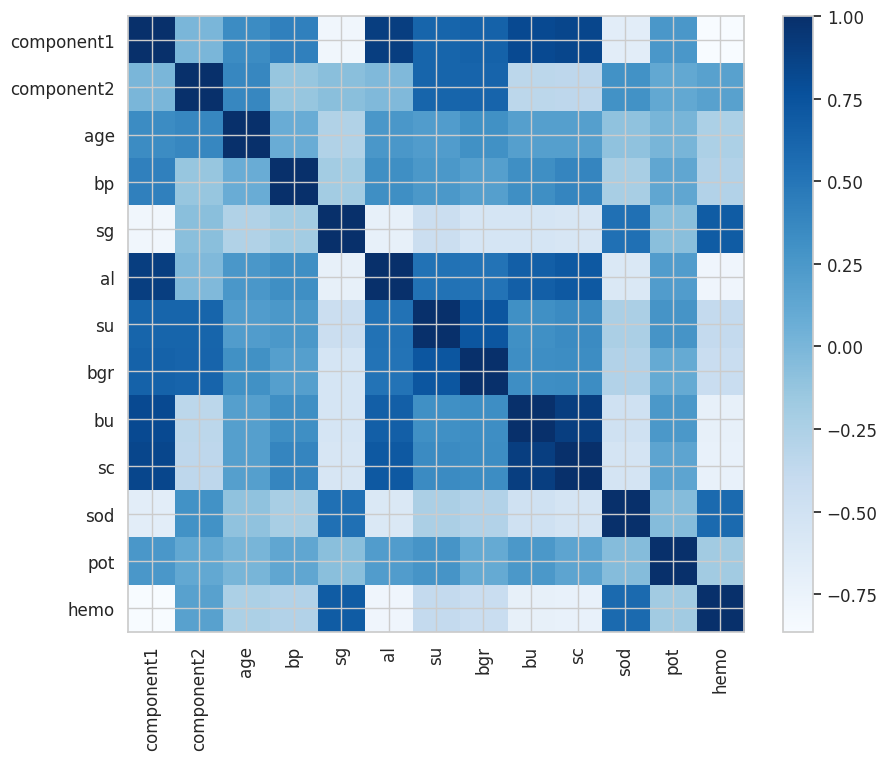

In [118]:
# Create a figure
fig = plt.figure(figsize=(10,8))
tick_marks = [i for i in range(len(df_corr.columns))]

plt.imshow(df_corr.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)

L'interpretazione delle componenti principali si basa sulla ricerca di quali variabili sono più fortemente correlate con ciascuna componente, ovvero quali di questi numeri sono grandi in grandezza, il più lontano da zero in entrambe le direzioni. Quali numeri consideriamo grandi o piccoli è ovviamente una decisione soggettiva. È necessario determinare a quale livello la correlazione è importante.

Dalla visualizzazione è possibile notare che il componente 1 è più correlato con le caratteristiche 'sc', 'bu', 'hemo' e 'al', mentre il componente 2 è più correlato con 'bgr'.

https://colab.research.google.com/drive/1RC_XulRdrqpYRq4h8pRl22cfg9a-_FvS?usp=sharing#scrollTo=-BCQxJWZz0ZC

<a id='isomap'></a>
## Isomap

Simile a PCA, *Isomap è anche una tecnica di apprendimento senza supervisione che riduce la dimensionalità del nostro set di dati.*

Non sono necessarie etichette o classificazioni per guidarlo, tranne i nostri dati grezzi.

**PCA è più veloce di Isomap e funziona bene nella maggior parte delle situazioni, ma il suo limite è che presuppone l'esistenza di una relazione lineare tra le tue caratteristiche.**

Cosa succede quando i tuoi dati hanno una struttura non lineare? *È necessario utilizzare Isomap*.

Isomap opera calcolando prima i vicini più prossimi di ciascun record. Questo viene fatto confrontando ogni campione con ogni altro campione nel set di dati. solo i campioni K-più vicini di un campione si qualificano per essere inclusi nell'elenco dei campioni più vicini.


Viene quindi costruito un grafo di quartiere collegando ciascun campione ai suoi k-vicini più vicini.


Isomap è in grado di recuperare e stimare in modo intelligente un'incorporamento di dimensioni inferiori, noto anche come collettore, percorrendo le distanze più brevi tra i campioni, saltando lungo la mappa di quartiere calcolata.

È con questa mappa che Isomap calcola una proiezione, o incorporamento dimensionale ridotto, che rappresenta il tuo set di dati attraverso il ridimensionamento multidimensionale.


Finché la relazione sottostante non è lineare, un altro utilizzo di Isomap è per raggruppare e identificare variazioni simili in campioni di dati simili. Per questo motivo, è estremamente utile come fase del preprocessore prima di condurre compiti di apprendimento supervisionato, come la classificazione o la regressione.

I vantaggi di Isomap includono anche la visualizzazione e la compressione dei dati.

https://blog.paperspace.com/dimension-reduction-with-isomap/

La differenza principale tra PCA e Isomap riguarda il fatto che PCA fa una trasformazione lineare mentre Isomap effettua una riduzione di dimensionalità attraverso trasformazioni non lineari.

Vediamo un esempio grafico per comprendere, supponiamo di avere i dati riportati in questo grafico:
<img src="img/distance.png" width="70%"/>
I dati sono tridimensionali e supponiamo di voler ridurre le dimensioni a 2.

Il risutato prodotto da PCA sarebbe il seguente:
<img src="img/distance_pca.png" width="70%"/>

Mentre IsoMap effettuerebbe un calcolo diverso della distanza (geodetica e non euclidea) che porterebbe a ottenere questo risultato:
<img src="img/distance_isomap.png" width="70%"/>

Prova a ridurre la dimensionalità del set di dati *face_data* con PCA e Isomap:

In [9]:
import scipy.io
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

In [10]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case) to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].values.reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100, extent=(x0, x1, y0, y1))
    
    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [12]:
import math

mat = scipy.io.loadmat('data/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].values.reshape(num_pixels, num_pixels).T.reshape(-1)
    
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016176,0.000000,0.000000,0.000000,0.007062,0.056710,0.192279,0.380607,0.504733,0.514920,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016176,0.110754,0.384988,0.510034,0.608609,0.743229,0.735126,0.664675,0.774494,0.792233,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047626,0.222901,0.257537,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
696,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003447,0.107047,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Riduci il dataframe df a tre componenti. Dopo averlo fatto, chiama *Plot2D*.

Il formato è: **Plot2D(T, title, x, y, num_to_plot=40)**:
- *T*: i nostri dati trasformati, archiviati in un NDArray
- *title*: il titolo del grafico
- *x*: Indice del componente principale che si vuole visualizzare sull'asse x; impostalo su 0 o 1
- *y* Indice del componente principale che si vuole visualizzare sull'asse y; impostalo su 1 o 2

In [13]:
from sklearn import preprocessing
from sklearn import manifold

# Feature scaling is a type of transformation that only changes the
# scale, but not number of features. Because of this, we can still
# use the original dataset's column names... so long as we keep in
# mind that the _units_ have been altered:

scaled = preprocessing.StandardScaler().fit_transform(df)
scaled = pd.DataFrame(scaled, columns=df.columns)

print("New Variances:\n", scaled.var())
print("New Describe:\n", scaled.describe())

New Variances:
 0       1.001435
1       1.001435
2       1.001435
3       1.001435
4       1.001435
          ...   
4091    0.000000
4092    0.000000
4093    0.000000
4094    0.000000
4095    0.000000
Length: 4096, dtype: float64
New Describe:
                0           1             2             3             4     \
count  6.980000e+02  698.000000  6.980000e+02  6.980000e+02  6.980000e+02   
mean   6.143446e-15    0.000000 -5.089848e-17 -5.089848e-17 -3.244778e-16   
std    1.000717e+00    1.000717  1.000717e+00  1.000717e+00  1.000717e+00   
min   -9.994111e-02   -0.143947 -2.114269e-01 -3.261680e-01 -4.272453e-01   
25%   -9.994111e-02   -0.143947 -2.114269e-01 -3.261680e-01 -4.272453e-01   
50%   -9.994111e-02   -0.143947 -2.114269e-01 -3.261680e-01 -4.272453e-01   
75%   -9.994111e-02   -0.143947 -2.114269e-01 -3.261680e-01 -3.457129e-01   
max    1.878917e+01   14.060419  1.027228e+01  6.925969e+00  5.041932e+00   

               5             6             7             8 

In [18]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=5, n_components=3)
iso.fit(scaled)
T1 = iso.transform(scaled)
pd.DataFrame(T1, columns = ['Component 0', 'Component 1', 'Component 2'])

,Component 0,Component 1,Component 2
0,-111.456647,-5.519294,-30.333398
1,152.080631,-75.410494,-25.453064
2,-91.521569,24.845071,-14.238302
3,316.102561,-140.446354,29.227583
4,-190.267400,54.850764,123.462793
...,...,...,...
693,-122.753527,117.974379,-40.825842
694,-195.929724,176.777961,-5.935456
695,281.854745,-22.166641,-60.631712
696,128.697168,-84.055788,91.616684


Come con PCA, **n_components** è il numero di elementi su cui vogliamo proiettare il nostro set di dati e **n_neighbors** definisce la dimensione del quartiere utilizzata per creare la mappa del quartiere del nodo. <br>
Più grande è il nostro valore *n_neighbors*, più tempo ci vorrà per calcolare la mappa dei quartieri del nodo.<br>
A differenza di PCA, le trasformazioni Isomap sono unidirezionali, quindi non saremo in grado di .inverse_transform() i nostri dati proiettati nel nostro spazio delle caratteristiche originale, anche se ha lo stesso numero di dimensioni del nostro set di dati originale.

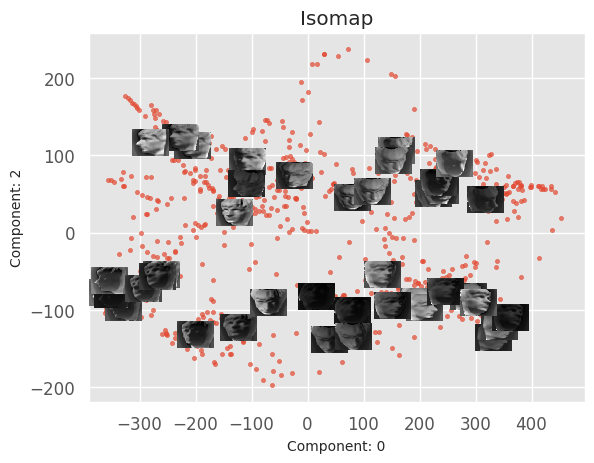

In [127]:
Plot2D(T1, 'Isomap', 0, 2, num_to_plot=40)

Con una rappresentazione di 2 componenti su 3, è possibile descrivere i dati del volto.

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>